In [1]:
import numpy as np

# Load the .npz file
file_path = "../output/Feature_0.npz"  # Replace with your actual file path
data = np.load(file_path)

# List all arrays stored in the .npz file
print("Keys in the .npz file:", data.files)

# Iterate through keys and display their contents
for key in data.files:
    print(f"\nKey: {key}")
    print(data[key])  # Print the array values

# Optionally, access a specific array
# specific_array = data['your_key']  # Replace 'your_key' with an actual key


Keys in the .npz file: ['train_feature', 'val_feature', 'train_targets', 'val_targets']

Key: train_feature
[[[1.35901108e-01 1.27535105e+00 3.88968349e-01 ... 3.09877306e-01
   5.08755505e-01 1.82991475e-01]
  [3.62516493e-01 1.23592818e+00 4.20735359e-01 ... 4.59013551e-01
   5.86111903e-01 8.70095789e-02]
  [3.32467616e-01 1.32193005e+00 3.45729411e-01 ... 4.40589458e-01
   6.02733254e-01 3.74066651e-01]
  ...
  [0.00000000e+00 0.00000000e+00 4.14914191e-02 ... 0.00000000e+00
   2.22425199e+00 2.75358468e-01]
  [5.15258849e-01 2.18108630e+00 7.81275392e-01 ... 6.29857004e-01
   1.09726608e+00 5.78486919e-02]
  [4.57284927e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   2.45432353e+00 7.08850098e+00]]

 [[5.74271679e-01 0.00000000e+00 6.40746236e-01 ... 6.09653831e-01
   3.50533187e-01 2.85570860e-01]
  [5.85008204e-01 0.00000000e+00 6.83648348e-01 ... 5.19600511e-01
   4.25508618e-01 1.71976268e-01]
  [5.70130169e-01 0.00000000e+00 6.30741596e-01 ... 6.54820502e-01
   3.5117

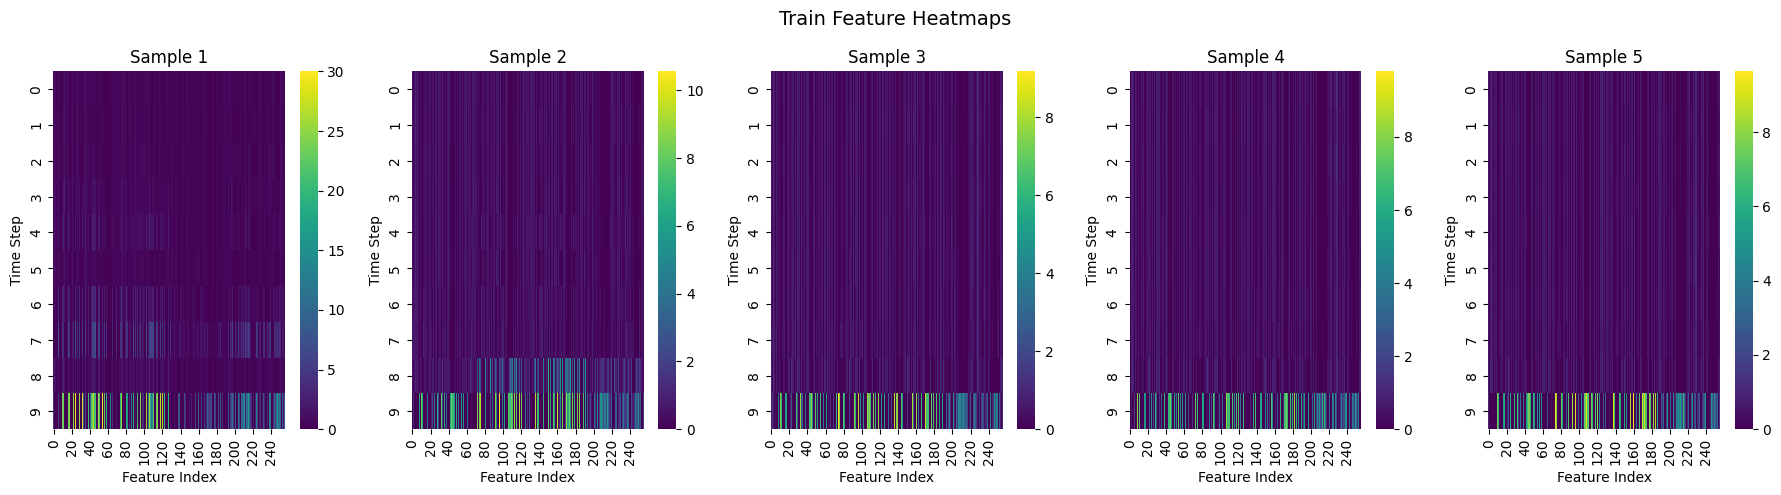

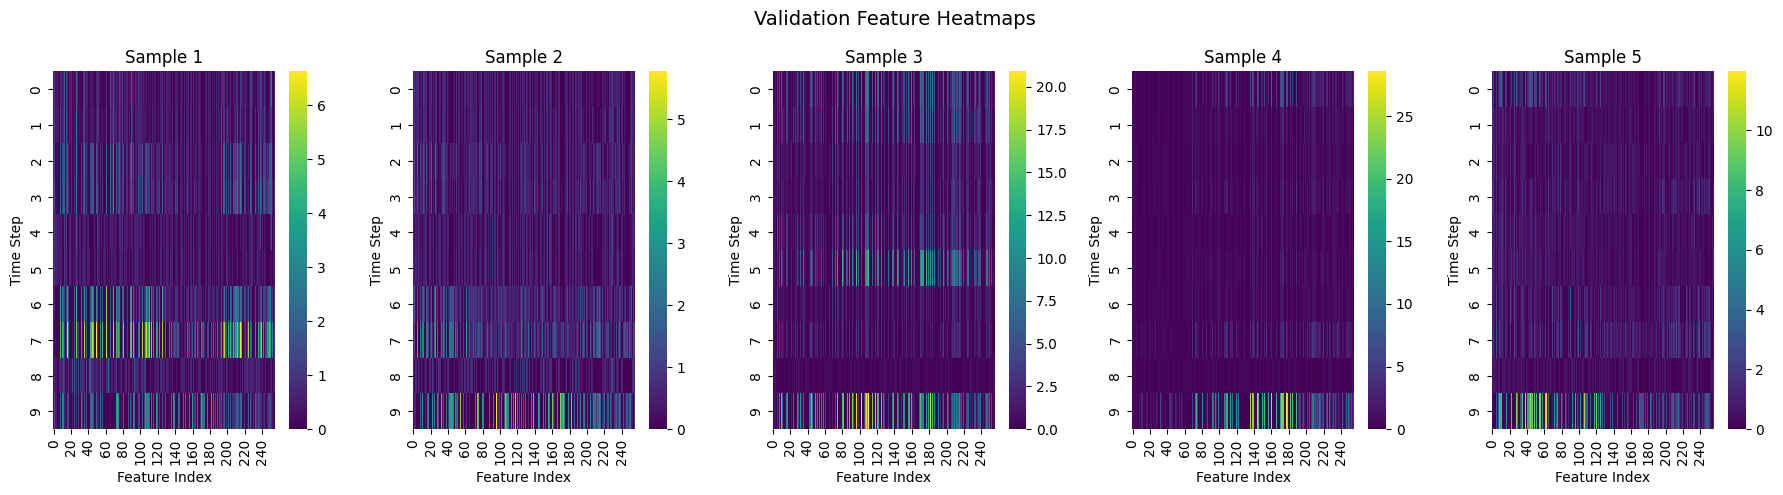

C:\Users\Victus\AppData\Local\Temp\ipykernel_23900\3711246002.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=np.arange(num_classes), y=class_counts, palette="magma")


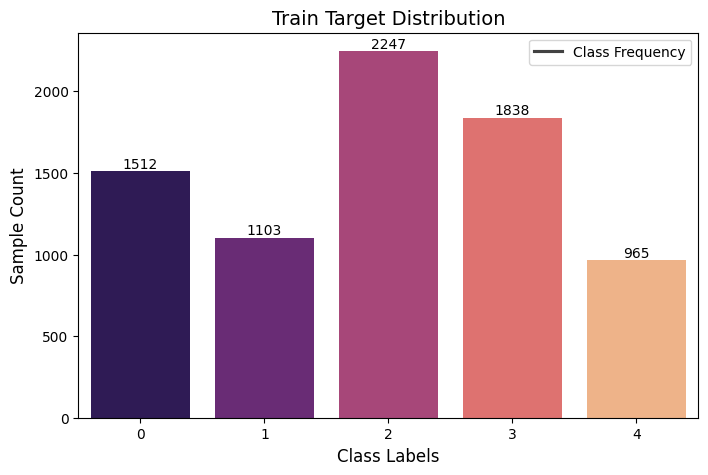

C:\Users\Victus\AppData\Local\Temp\ipykernel_23900\3711246002.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=np.arange(num_classes), y=class_counts, palette="magma")


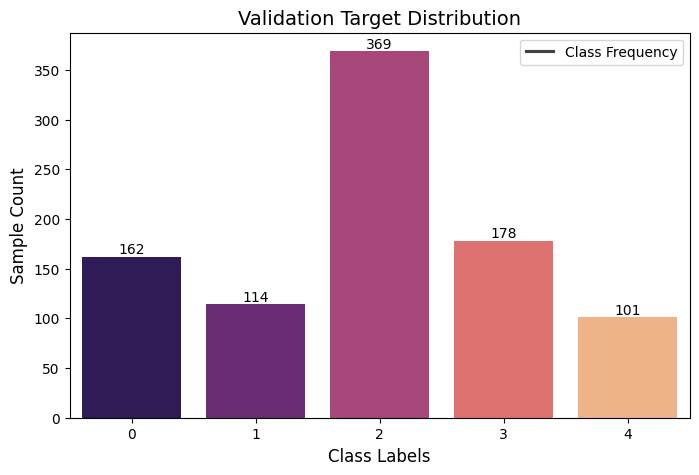

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the .npz file
file_path = "../output/Feature_0.npz"  # Replace with the actual file path
data = np.load(file_path)

# Extract features and targets
train_feature = data['train_feature']  # Shape: (samples, timesteps, features)
val_feature = data['val_feature']
train_targets = data['train_targets']  # Shape: (samples, num_classes)
val_targets = data['val_targets']

# Function to plot feature heatmaps
def plot_feature_heatmap(features, title, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(18, 5))
    fig.suptitle(title, fontsize=14)

    for i in range(num_samples):
        ax = axes[i]
        sns.heatmap(features[i], cmap="viridis", ax=ax, cbar=True)
        ax.set_title(f"Sample {i+1}")
        ax.set_xlabel("Feature Index")
        ax.set_ylabel("Time Step")
    
    plt.tight_layout()
    plt.show()

# Plot heatmaps for train and validation features
plot_feature_heatmap(train_feature, "Train Feature Heatmaps")
plot_feature_heatmap(val_feature, "Validation Feature Heatmaps")

# Function to plot target distributions
def plot_target_distribution(targets, title):
    class_counts = np.sum(targets, axis=0)  # Count occurrences of each class
    num_classes = len(class_counts)
    
    plt.figure(figsize=(8, 5))
    ax = sns.barplot(x=np.arange(num_classes), y=class_counts, palette="magma")
    
    # Labels and title
    plt.xlabel("Class Labels", fontsize=12)
    plt.ylabel("Sample Count", fontsize=12)
    plt.title(title, fontsize=14)
    
    # Add value labels on top of bars
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='black')

    plt.legend(["Class Frequency"], loc="upper right")
    plt.show()

# Plot target distributions
plot_target_distribution(train_targets, "Train Target Distribution")
plot_target_distribution(val_targets, "Validation Target Distribution")


In [6]:
import numpy as np
import glob

# Path to your NPZ files (update this to match your file location)
npz_files = glob.glob("../output/*.npz")  # Replace with actual folder path

# Initialize arrays to accumulate counts (for 5 classes)
total_train_counts = np.zeros(5, dtype=int)
total_val_counts = np.zeros(5, dtype=int)

# Loop through each file
for file in npz_files:
    data = np.load(file)
    
    # Extract train and validation targets
    train_targets = data['train_targets']  # Shape: (samples, 5)
    val_targets = data['val_targets']      # Shape: (samples, 5)
    
    # Sum the occurrences of each class
    total_train_counts += np.sum(train_targets, axis=0).astype(int)
    total_val_counts += np.sum(val_targets, axis=0).astype(int)

# Print the accumulated counts
print("Accumulated Train Sample Counts:", total_train_counts)
print("Accumulated Validation Sample Counts:", total_val_counts)

# Save the accumulated counts for future use
np.savez("accumulated_counts.npz", train_counts=total_train_counts, val_counts=total_val_counts)


Accumulated Train Sample Counts: [15066 10953 23544 18144  9594]
Accumulated Validation Sample Counts: [1674 1217 2616 2016 1066]


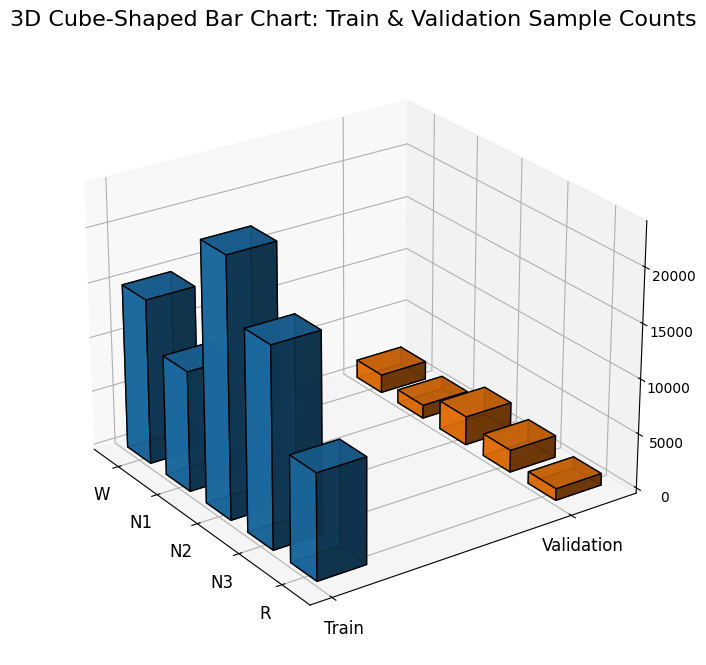

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Custom class labels
class_labels = ["W", "N1", "N2", "N3", "R"]

# Accumulated sample counts
train_sample_counts = np.array([15066, 10953, 23544, 18144, 9594])
val_sample_counts = np.array([1674, 1217, 2616, 2016, 1066])

# X-axis positions for bars
x = np.arange(len(class_labels))
y_train = np.zeros(len(class_labels))  # Train bars at y=0
y_val = np.ones(len(class_labels))  # Validation bars at y=1
bar_width = 0.6  # Width of bars
bar_depth = 0.2  # Depth for cube effect

# Create figure and 3D axes
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Define colors (professional color scheme)
train_color = "#1f77b4"  # Deep blue
val_color = "#ff7f0e"  # Orange

# Plot Train cubes
ax.bar3d(x, y_train, np.zeros(len(train_sample_counts)), bar_width, bar_depth, train_sample_counts, 
         color=train_color, alpha=0.9, edgecolor="black", linewidth=1.0)

# Plot Validation cubes
ax.bar3d(x, y_val, np.zeros(len(val_sample_counts)), bar_width, bar_depth, val_sample_counts, 
         color=val_color, alpha=0.9, edgecolor="black", linewidth=1.0)

# Labels & Title
# ax.set_xlabel("Sleep Stages", fontsize=14, labelpad=10)
# ax.set_ylabel("Data Type0", fontsize=14, labelpad=10)
ax.set_zlabel("Sample Count", fontsize=14, labelpad=10)
ax.set_title("3D Cube-Shaped Bar Chart: Train & Validation Sample Counts", fontsize=16, pad=10)

# Set custom x-axis labels
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(class_labels, fontsize=12)

# Set custom y-axis labels
ax.set_yticks([0, 1])
ax.set_yticklabels(["Train", "Validation"], fontsize=12)

# Rotate View for better visibility
ax.view_init(elev=25, azim=-35)  # Adjust angles for better 3D effect

# Show the plot
plt.show()


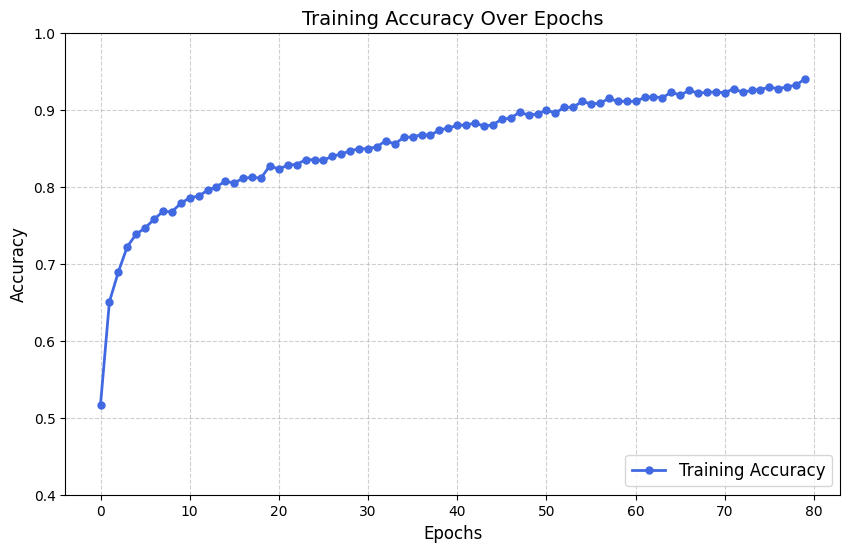

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the text file
file_path = "../output/acc.txt"  # Replace with your actual file path
with open(file_path, "r") as file:
    data = eval(file.read())  # Convert string list to Python list

# Convert data to numpy array for plotting
data = np.array(data)

# Plot the training accuracy
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=2, label="Training Accuracy")

# Labels and title
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training Accuracy Over Epochs", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Set y-axis limits (optional, for better visualization)
plt.ylim(0.4, 1.0)  

# Add legend
plt.legend(loc="lower right", fontsize=12)

# Show the plot
plt.show()


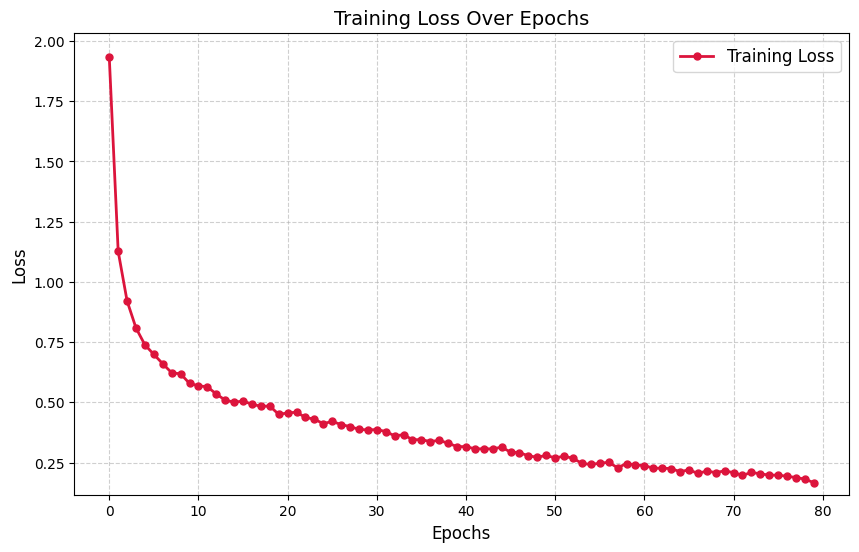

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Training loss values (from your text file)
training_loss = [
    1.9341, 1.1267, 0.9205, 0.8084, 0.7384, 0.6990, 0.6600, 0.6226, 0.6183, 0.5785, 
    0.5688, 0.5644, 0.5345, 0.5091, 0.5006, 0.5052, 0.4923, 0.4835, 0.4846, 0.4500,
    0.4561, 0.4590, 0.4374, 0.4299, 0.4115, 0.4208, 0.4077, 0.3994, 0.3876, 0.3855,
    0.3870, 0.3789, 0.3609, 0.3655, 0.3450, 0.3450, 0.3373, 0.3422, 0.3302, 0.3163,
    0.3162, 0.3070, 0.3070, 0.3068, 0.3139, 0.2932, 0.2913, 0.2777, 0.2724, 0.2795,
    0.2695, 0.2764, 0.2676, 0.2465, 0.2422, 0.2472, 0.2511, 0.2284, 0.2460, 0.2403,
    0.2373, 0.2268, 0.2264, 0.2253, 0.2120, 0.2199, 0.2048, 0.2148, 0.2083, 0.2156,
    0.2081, 0.1971, 0.2088, 0.2036, 0.1977, 0.1979, 0.1931, 0.1879, 0.1814, 0.1665
]

# Convert list to numpy array
training_loss = np.array(training_loss)

# Create figure
plt.figure(figsize=(10, 6))
plt.plot(training_loss, marker='o', linestyle='-', color='crimson', markersize=5, linewidth=2, label="Training Loss")

# Labels and title
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training Loss Over Epochs", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Set y-axis limit for better visibility (Optional)
plt.ylim(min(training_loss) - 0.05, max(training_loss) + 0.1)

# Add legend
plt.legend(loc="upper right", fontsize=12)

# Show the plot
plt.show()


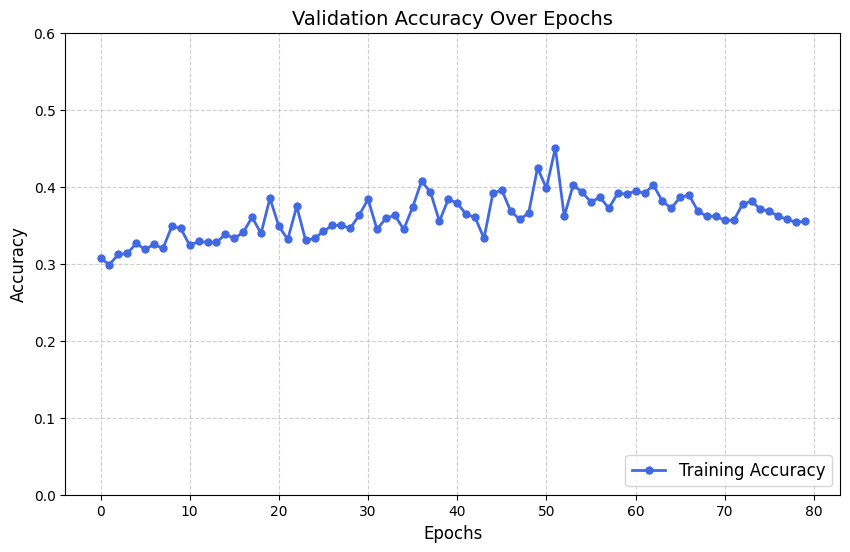

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the text file
file_path = "../output/val_acc.txt"  # Replace with your actual file path
with open(file_path, "r") as file:
    data = eval(file.read())  # Convert string list to Python list

# Convert data to numpy array for plotting
data = np.array(data)

# Plot the training accuracy
plt.figure(figsize=(10, 6))
plt.plot(data, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=2, label="Training Accuracy")

# Labels and title
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Validation Accuracy Over Epochs", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Set y-axis limits (optional, for better visualization)
plt.ylim(0, 0.6)  

# Add legend
plt.legend(loc="lower right", fontsize=12)

# Show the plot
plt.show()


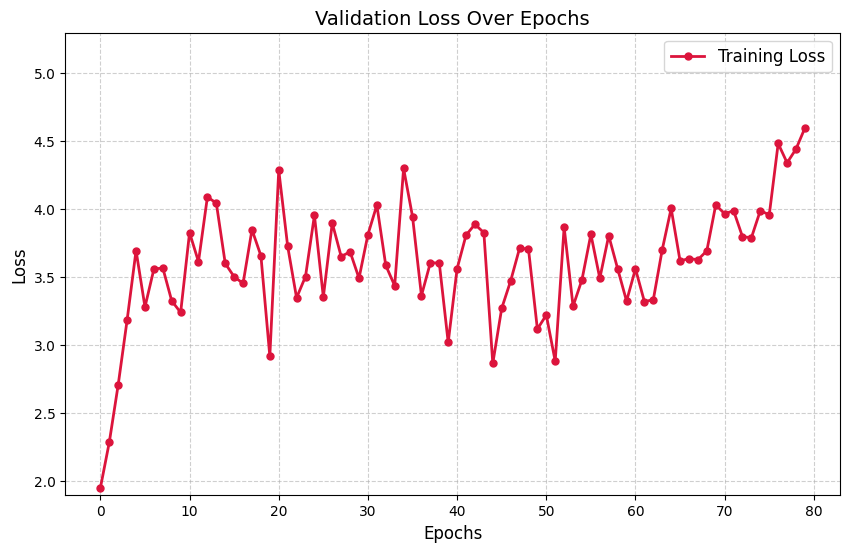

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Training loss values (from your text file)
training_loss = [1.949290156364441, 2.2852087020874023, 2.708583354949951, 3.1839466094970703, 3.6941771507263184, 3.279026508331299, 3.5575952529907227, 3.566251754760742, 3.3239786624908447, 3.238774061203003, 3.8256733417510986, 3.6118648052215576, 4.087544918060303, 4.042706489562988, 3.59924578666687, 3.5009758472442627, 3.4527759552001953, 3.8471150398254395, 3.655956745147705, 2.916609287261963, 4.285103797912598, 3.7256920337677, 3.3462796211242676, 3.503143787384033, 3.952713966369629, 3.352189064025879, 3.8961150646209717, 3.6499857902526855, 3.684911012649536, 3.490347146987915, 3.811269760131836, 4.028090000152588, 3.585033893585205, 3.435497999191284, 4.29734468460083, 3.9438750743865967, 3.362529754638672, 3.6042520999908447, 3.6022095680236816, 3.018495798110962, 3.560945987701416, 3.8067970275878906, 3.886953592300415, 3.8248956203460693, 2.864532232284546, 3.2692368030548096, 3.4700944423675537, 3.7097678184509277, 3.706376552581787, 3.1166186332702637, 3.220149278640747, 2.8806309700012207, 3.866119861602783, 3.2845635414123535, 3.4792492389678955, 3.8129844665527344, 3.489882230758667, 3.803316593170166, 3.560441493988037, 3.3227341175079346, 3.5594210624694824, 3.318765640258789, 3.3328518867492676, 3.7002921104431152, 4.003296375274658, 3.6174044609069824, 3.635328531265259, 3.62631893157959, 3.6921558380126953, 4.029054164886475, 3.9642062187194824, 3.9868545532226562, 3.795400857925415, 3.7886195182800293, 3.9880237579345703, 3.95592999458313, 4.480784893035889, 4.3387980461120605, 4.440031051635742, 4.5948805809021]

# Convert list to numpy array
training_loss = np.array(training_loss)

# Create figure
plt.figure(figsize=(10, 6))
plt.plot(training_loss, marker='o', linestyle='-', color='crimson', markersize=5, linewidth=2, label="Training Loss")

# Labels and title
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Validation Loss Over Epochs", fontsize=14)
plt.grid(True, linestyle="--", alpha=0.6)

# Set y-axis limit for better visibility (Optional)
plt.ylim(min(training_loss) - 0.05, max(training_loss)+0.6 + 0.1)

# Add legend
plt.legend(loc="upper right", fontsize=12)

# Show the plot
plt.show()


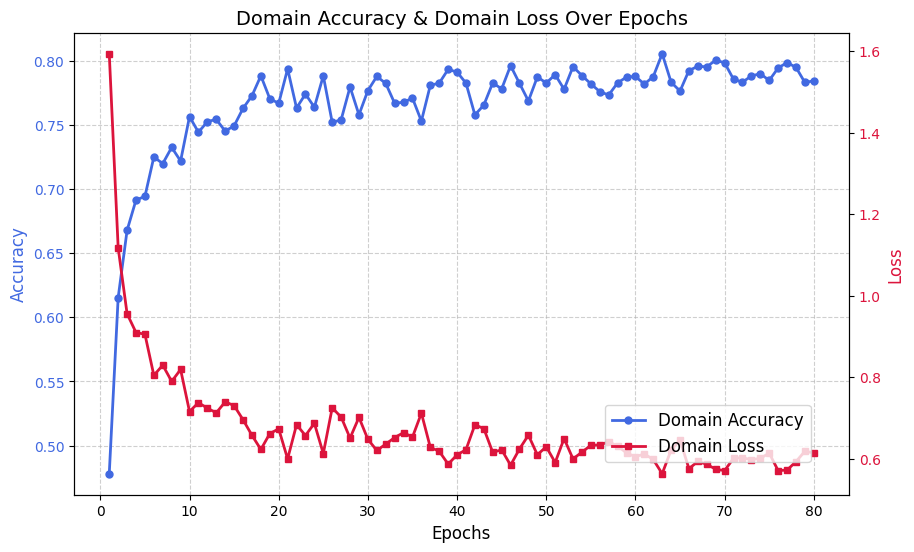

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Domain accuracy values
domain_accuracy = [
    0.4781, 0.6154, 0.6678, 0.6914, 0.6942, 0.7249, 0.7198, 0.7324, 0.7218, 0.7564, 
    0.7442, 0.7525, 0.7542, 0.7451, 0.7492, 0.7628, 0.7726, 0.7882, 0.7704, 0.7667, 
    0.7936, 0.7631, 0.7740, 0.7637, 0.7882, 0.7519, 0.7539, 0.7795, 0.7578, 0.7767, 
    0.7877, 0.7823, 0.7668, 0.7676, 0.7708, 0.7529, 0.7808, 0.7825, 0.7932, 0.7911, 
    0.7825, 0.7577, 0.7654, 0.7827, 0.7780, 0.7961, 0.7823, 0.7686, 0.7873, 0.7826, 
    0.7891, 0.7777, 0.7953, 0.7884, 0.7819, 0.7759, 0.7732, 0.7827, 0.7872, 0.7877, 
    0.7817, 0.7876, 0.8054, 0.7832, 0.7763, 0.7923, 0.7956, 0.7952, 0.8004, 0.7983, 
    0.7855, 0.7832, 0.7881, 0.7898, 0.7846, 0.7943, 0.7985, 0.7948, 0.7830, 0.7843
]

# Domain loss values
domain_loss = [
    1.5939, 1.1176, 0.9559, 0.9099, 0.9057, 0.8049, 0.8298, 0.7900, 0.8192, 0.7161, 
    0.7378, 0.7244, 0.7129, 0.7398, 0.7306, 0.6960, 0.6578, 0.6230, 0.6619, 0.6736, 
    0.5999, 0.6837, 0.6572, 0.6872, 0.6130, 0.7251, 0.7025, 0.6510, 0.7017, 0.6479, 
    0.6206, 0.6360, 0.6522, 0.6643, 0.6534, 0.7121, 0.6283, 0.6184, 0.5872, 0.6097, 
    0.6225, 0.6836, 0.6742, 0.6159, 0.6222, 0.5844, 0.6243, 0.6581, 0.6100, 0.6297, 
    0.5910, 0.6497, 0.5999, 0.6164, 0.6332, 0.6342, 0.6415, 0.6317, 0.6146, 0.6052, 
    0.6120, 0.5984, 0.5635, 0.6218, 0.6461, 0.5760, 0.5935, 0.5867, 0.5744, 0.5712, 
    0.6015, 0.6026, 0.5981, 0.6011, 0.6142, 0.5712, 0.5724, 0.5931, 0.6186, 0.6146
]

# Convert lists to numpy arrays
epochs = np.arange(1, len(domain_accuracy) + 1)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Domain Accuracy (Primary Y-axis)
ax1.plot(epochs, domain_accuracy, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=2, label="Domain Accuracy")
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.grid(True, linestyle="--", alpha=0.6)

# Create second y-axis for Domain Loss
ax2 = ax1.twinx()
ax2.plot(epochs, domain_loss, marker='s', linestyle='-', color='crimson', markersize=5, linewidth=2, label="Domain Loss")
ax2.set_ylabel("Loss", fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Title and Legends
plt.title("Domain Accuracy & Domain Loss Over Epochs", fontsize=14)
fig.legend(loc="lower right", bbox_to_anchor=(0.87, 0.15), fontsize=12)

# Show the plot
plt.show()


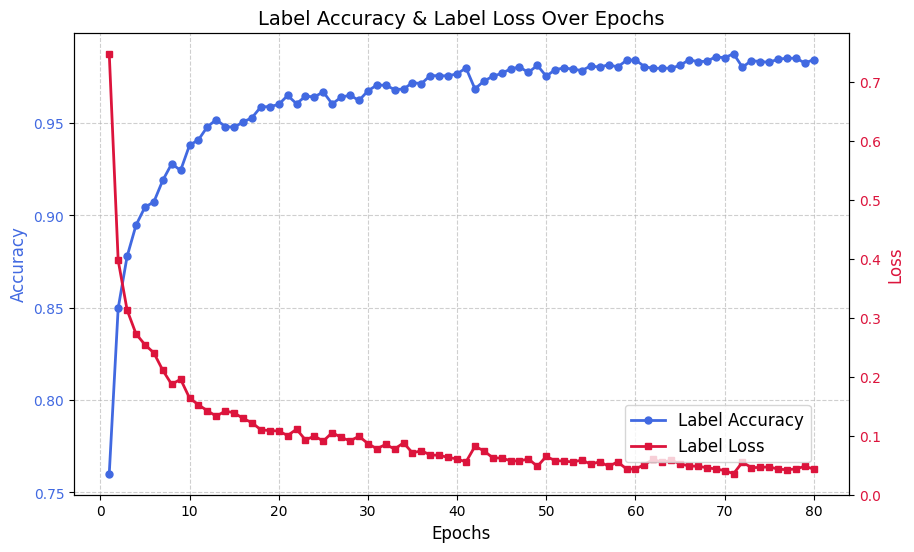

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Domain accuracy values
domain_accuracy = [0.760113000869751, 0.8497495651245117, 0.8777449727058411, 0.8946962952613831, 0.9044561386108398, 0.9072813391685486, 0.9189674854278564, 0.9279568791389465, 0.9243611097335815, 0.9379735589027405, 0.9409272074699402, 0.9479902386665344, 0.9518428444862366, 0.9481186866760254, 0.9477334022521973, 0.950558602809906, 0.9528701901435852, 0.9587774276733398, 0.9589058756828308, 0.9600616693496704, 0.9649415612220764, 0.9604468941688538, 0.9645563364028931, 0.9641710519790649, 0.9668678641319275, 0.9603185057640076, 0.9640426635742188, 0.9650700092315674, 0.9622447490692139, 0.9673815369606018, 0.9705920219421387, 0.9704635739326477, 0.9681520462036133, 0.9684088826179504, 0.9718762040138245, 0.9713625311851501, 0.9757287502288818, 0.9756003618240356, 0.9756003618240356, 0.9766277074813843, 0.9798381924629211, 0.9685373306274414, 0.9726467132568359, 0.9753435254096985, 0.9768845438957214, 0.9793245196342468, 0.9803518652915955, 0.9773982167243958, 0.9812508225440979, 0.9753435254096985, 0.9789392352104187, 0.9798381924629211, 0.9791960716247559, 0.9784255623817444, 0.9809939861297607, 0.9802234768867493, 0.9816360473632812, 0.9803518652915955, 0.9839476346969604, 0.9842044711112976, 0.9806087017059326, 0.979581356048584, 0.9797097444534302, 0.9797097444534302, 0.9812508225440979, 0.9842044711112976, 0.9833055138587952, 0.9834339022636414, 0.9858738780021667, 0.9853602051734924, 0.9875433444976807, 0.9802234768867493, 0.9838191866874695, 0.9833055138587952, 0.982920229434967, 0.984589695930481, 0.9851033687591553, 0.9851033687591553, 0.9825350046157837, 0.9843328595161438]

# Domain loss values
domain_loss = [0.7476152181625366, 0.397231787443161, 0.3132420778274536, 0.2726733386516571, 0.25437548756599426, 0.240448996424675, 0.21101175248622894, 0.1870337575674057, 0.19582153856754303, 0.16396579146385193, 0.15245236456394196, 0.14232943952083588, 0.13313408195972443, 0.14172589778900146, 0.13893884420394897, 0.12935134768486023, 0.12212768942117691, 0.11005537956953049, 0.10869214683771133, 0.1080109104514122, 0.10032334178686142, 0.11102098971605301, 0.09292379766702652, 0.09935134649276733, 0.0909428745508194, 0.10532843321561813, 0.09711252897977829, 0.09120839834213257, 0.0991641953587532, 0.08675745129585266, 0.0778592973947525, 0.08529507368803024, 0.07740151882171631, 0.08799365907907486, 0.0708664134144783, 0.07460413128137589, 0.06732907146215439, 0.06685438007116318, 0.06323273479938507, 0.0606408417224884, 0.05559952184557915, 0.08184558898210526, 0.07461859285831451, 0.06259950995445251, 0.06200569123029709, 0.057646989822387695, 0.057011354714632034, 0.06077995523810387, 0.04810420051217079, 0.06492719799280167, 0.057719018310308456, 0.057119861245155334, 0.05528731644153595, 0.05894658342003822, 0.05149642750620842, 0.056077055633068085, 0.04796801880002022, 0.05575369670987129, 0.043664999306201935, 0.04341975599527359, 0.05121244862675667, 0.05992639437317848, 0.05473995953798294, 0.05844555050134659, 0.05270268768072128, 0.0486074797809124, 0.0482766330242157, 0.04579450190067291, 0.043635692447423935, 0.04098555073142052, 0.035596828907728195, 0.05520324781537056, 0.04601749777793884, 0.04621327295899391, 0.04728657752275467, 0.043264761567115784, 0.04239175468683243, 0.043664585798978806, 0.048282358795404434, 0.043375711888074875] 

# Convert lists to numpy arrays
epochs = np.arange(1, len(domain_accuracy) + 1)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Domain Accuracy (Primary Y-axis)
ax1.plot(epochs, domain_accuracy, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=2, label="Label Accuracy")
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.grid(True, linestyle="--", alpha=0.6)

# Create second y-axis for Domain Loss
ax2 = ax1.twinx()
ax2.plot(epochs, domain_loss, marker='s', linestyle='-', color='crimson', markersize=5, linewidth=2, label="Label Loss")
ax2.set_ylabel("Loss", fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Title and Legends
plt.title("Label Accuracy & Label Loss Over Epochs", fontsize=14)
fig.legend(loc="lower right", bbox_to_anchor=(0.87, 0.15), fontsize=12)

# Show the plot
plt.show()


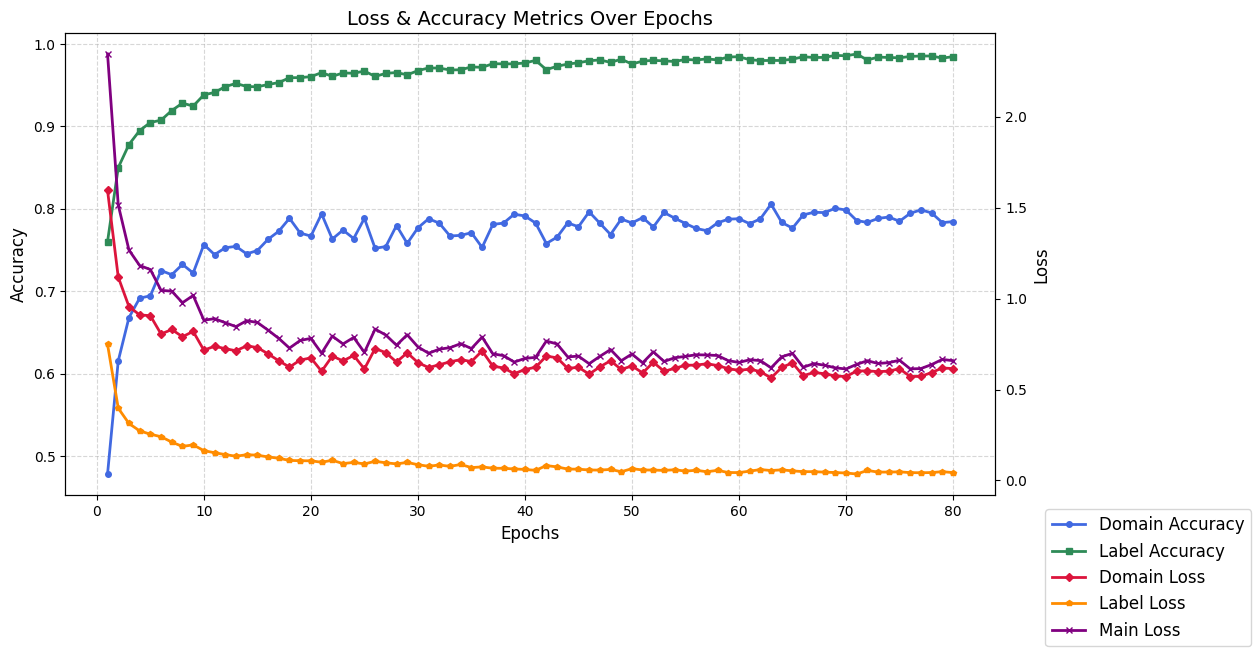

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# Domain Accuracy
domain_accuracy = np.array([0.47810453176498413, 0.6153846383094788, 0.6677796244621277, 0.6914087533950806, 0.6942339539527893, 0.7249261736869812, 0.7197893857955933, 0.7323744893074036, 0.7218440771102905, 0.7563888430595398, 0.7441890239715576, 0.7525362968444824, 0.7542057037353516, 0.7450879812240601, 0.7491973638534546, 0.7628098130226135, 0.7725696563720703, 0.7882367968559265, 0.7703865170478821, 0.7666623592376709, 0.7936304211616516, 0.7630666494369507, 0.7739822864532471, 0.763708770275116, 0.7882367968559265, 0.7518941760063171, 0.7539488673210144, 0.7795042991638184, 0.7578014731407166, 0.7766790986061096, 0.7877231240272522, 0.7823294997215271, 0.7667908072471619, 0.7675613164901733, 0.7707718014717102, 0.7529215216636658, 0.7807884812355042, 0.7824579477310181, 0.7932451367378235, 0.7910619974136353, 0.7824579477310181, 0.7576730251312256, 0.7653781771659851, 0.7827147841453552, 0.7779632806777954, 0.796070396900177, 0.7823294997215271, 0.768588662147522, 0.7873378992080688, 0.7825863361358643, 0.789135754108429, 0.7777064442634583, 0.7952998876571655, 0.7883652448654175, 0.7819442749023438, 0.7759085893630981, 0.7732117772102356, 0.7827147841453552, 0.7872094511985779, 0.7877231240272522, 0.7816874384880066, 0.787594735622406, 0.8054449558258057, 0.7832284569740295, 0.7762938141822815, 0.7923462390899658, 0.7955567240715027, 0.7951714396476746, 0.8004366159439087, 0.7982534766197205, 0.785539984703064, 0.7832284569740295, 0.7881084084510803, 0.7897778153419495, 0.7846410870552063, 0.7942724823951721, 0.7985103130340576, 0.7947861552238464, 0.7829716205596924, 0.7842558026313782])  # Use your domain accuracy values
# Domain Loss
domain_loss = np.array([1.5938925743103027, 1.1175613403320312, 0.9558843970298767, 0.9098642468452454, 0.9056857824325562, 0.8049392104148865, 0.829771101474762, 0.7899717688560486, 0.8192388415336609, 0.7160757780075073, 0.7378331422805786, 0.724380612373352, 0.7128998041152954, 0.7398260831832886, 0.7305547595024109, 0.6959599256515503, 0.6577971577644348, 0.6230210661888123, 0.6618687510490417, 0.6736345291137695, 0.5999157428741455, 0.6836737394332886, 0.657192051410675, 0.687187135219574, 0.6129794120788574, 0.7251368761062622, 0.7024593949317932, 0.6509653925895691, 0.701734721660614, 0.6478539705276489, 0.6206212639808655, 0.6359773874282837, 0.6522277593612671, 0.664338231086731, 0.6534441709518433, 0.7121140360832214, 0.6283331513404846, 0.6184132099151611, 0.5871782302856445, 0.6097080707550049, 0.6224803328514099, 0.6836232542991638, 0.6742252707481384, 0.6159430742263794, 0.6221813559532166, 0.5844471454620361, 0.6242730617523193, 0.658148467540741, 0.6100453734397888, 0.6296719908714294, 0.5909664034843445, 0.6497120261192322, 0.5999523401260376, 0.6164484620094299, 0.6331931948661804, 0.6341589093208313, 0.6414840817451477, 0.6316787600517273, 0.6145688891410828, 0.6052319407463074, 0.6119948625564575, 0.598371684551239, 0.5634607076644897, 0.621789813041687, 0.6461385488510132, 0.5759756565093994, 0.5934605598449707, 0.5867260098457336, 0.574433445930481, 0.5712437629699707, 0.6015040278434753, 0.6026131510734558, 0.5980640053749084, 0.6010610461235046, 0.6141972541809082, 0.5712047815322876, 0.5723786950111389, 0.5931229591369629, 0.6185895800590515, 0.6145755052566528])  # Use your domain loss values
# Label Accuracy
label_accuracy = np.array([0.760113000869751, 0.8497495651245117, 0.8777449727058411, 0.8946962952613831, 0.9044561386108398, 0.9072813391685486, 0.9189674854278564, 0.9279568791389465, 0.9243611097335815, 0.9379735589027405, 0.9409272074699402, 0.9479902386665344, 0.9518428444862366, 0.9481186866760254, 0.9477334022521973, 0.950558602809906, 0.9528701901435852, 0.9587774276733398, 0.9589058756828308, 0.9600616693496704, 0.9649415612220764, 0.9604468941688538, 0.9645563364028931, 0.9641710519790649, 0.9668678641319275, 0.9603185057640076, 0.9640426635742188, 0.9650700092315674, 0.9622447490692139, 0.9673815369606018, 0.9705920219421387, 0.9704635739326477, 0.9681520462036133, 0.9684088826179504, 0.9718762040138245, 0.9713625311851501, 0.9757287502288818, 0.9756003618240356, 0.9756003618240356, 0.9766277074813843, 0.9798381924629211, 0.9685373306274414, 0.9726467132568359, 0.9753435254096985, 0.9768845438957214, 0.9793245196342468, 0.9803518652915955, 0.9773982167243958, 0.9812508225440979, 0.9753435254096985, 0.9789392352104187, 0.9798381924629211, 0.9791960716247559, 0.9784255623817444, 0.9809939861297607, 0.9802234768867493, 0.9816360473632812, 0.9803518652915955, 0.9839476346969604, 0.9842044711112976, 0.9806087017059326, 0.979581356048584, 0.9797097444534302, 0.9797097444534302, 0.9812508225440979, 0.9842044711112976, 0.9833055138587952, 0.9834339022636414, 0.9858738780021667, 0.9853602051734924, 0.9875433444976807, 0.9802234768867493, 0.9838191866874695, 0.9833055138587952, 0.982920229434967, 0.984589695930481, 0.9851033687591553, 0.9851033687591553, 0.9825350046157837, 0.9843328595161438])  # Replace with your label accuracy values
# Label Loss
label_loss = np.array([0.7476152181625366, 0.397231787443161, 0.3132420778274536, 0.2726733386516571, 0.25437548756599426, 0.240448996424675, 0.21101175248622894, 0.1870337575674057, 0.19582153856754303, 0.16396579146385193, 0.15245236456394196, 0.14232943952083588, 0.13313408195972443, 0.14172589778900146, 0.13893884420394897, 0.12935134768486023, 0.12212768942117691, 0.11005537956953049, 0.10869214683771133, 0.1080109104514122, 0.10032334178686142, 0.11102098971605301, 0.09292379766702652, 0.09935134649276733, 0.0909428745508194, 0.10532843321561813, 0.09711252897977829, 0.09120839834213257, 0.0991641953587532, 0.08675745129585266, 0.0778592973947525, 0.08529507368803024, 0.07740151882171631, 0.08799365907907486, 0.0708664134144783, 0.07460413128137589, 0.06732907146215439, 0.06685438007116318, 0.06323273479938507, 0.0606408417224884, 0.05559952184557915, 0.08184558898210526, 0.07461859285831451, 0.06259950995445251, 0.06200569123029709, 0.057646989822387695, 0.057011354714632034, 0.06077995523810387, 0.04810420051217079, 0.06492719799280167, 0.057719018310308456, 0.057119861245155334, 0.05528731644153595, 0.05894658342003822, 0.05149642750620842, 0.056077055633068085, 0.04796801880002022, 0.05575369670987129, 0.043664999306201935, 0.04341975599527359, 0.05121244862675667, 0.05992639437317848, 0.05473995953798294, 0.05844555050134659, 0.05270268768072128, 0.0486074797809124, 0.0482766330242157, 0.04579450190067291, 0.043635692447423935, 0.04098555073142052, 0.035596828907728195, 0.05520324781537056, 0.04601749777793884, 0.04621327295899391, 0.04728657752275467, 0.043264761567115784, 0.04239175468683243, 0.043664585798978806, 0.048282358795404434, 0.043375711888074875])  # Replace with your label loss values
# Main Loss (Your provided values)
main_loss = np.array([
    2.3439, 1.5139, 1.2667, 1.1814, 1.1594, 1.0450, 1.0404, 0.9769, 1.0168, 0.8810, 
    0.8891, 0.8672, 0.8455, 0.8781, 0.8684, 0.8262, 0.7807, 0.7275, 0.7694, 0.7811,
    0.6996, 0.7934, 0.7503, 0.7861, 0.7039, 0.8320, 0.7995, 0.7434, 0.8009, 0.7342,
    0.6993, 0.7217, 0.7298, 0.7520, 0.7249, 0.7881, 0.6961, 0.6861, 0.6509, 0.6708,
    0.6767, 0.7662, 0.7503, 0.6793, 0.6833, 0.6418, 0.6820, 0.7195, 0.6582, 0.6951,
    0.6465, 0.7070, 0.6542, 0.6744, 0.6822, 0.6909, 0.6896, 0.6868, 0.6585, 0.6487,
    0.6634, 0.6589, 0.6189, 0.6799, 0.6986, 0.6224, 0.6424, 0.6333, 0.6191, 0.6128,
    0.6382, 0.6581, 0.6430, 0.6474, 0.6609, 0.6133, 0.6150, 0.6370, 0.6654, 0.6583
])

# Define epochs
epochs = np.arange(1, len(main_loss) + 1)

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Accuracy (Primary Y-axis)
ax1.plot(epochs, domain_accuracy, marker='o', linestyle='-', color='royalblue', markersize=4, linewidth=2, label="Domain Accuracy")
ax1.plot(epochs, label_accuracy, marker='s', linestyle='-', color='seagreen', markersize=4, linewidth=2, label="Label Accuracy")
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, linestyle="--", alpha=0.5)

# Create second Y-axis for Loss
ax2 = ax1.twinx()
ax2.plot(epochs, domain_loss, marker='D', linestyle='-', color='crimson', markersize=4, linewidth=2, label="Domain Loss")
ax2.plot(epochs, label_loss, marker='p', linestyle='-', color='darkorange', markersize=4, linewidth=2, label="Label Loss")
ax2.plot(epochs, main_loss, marker='x', linestyle='-', color='purple', markersize=5, linewidth=2, label="Main Loss")
ax2.set_ylabel("Loss", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and Legends
plt.title("Loss & Accuracy Metrics Over Epochs", fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(1.12, 0.1), fontsize=12)

# Show the plot
plt.show()


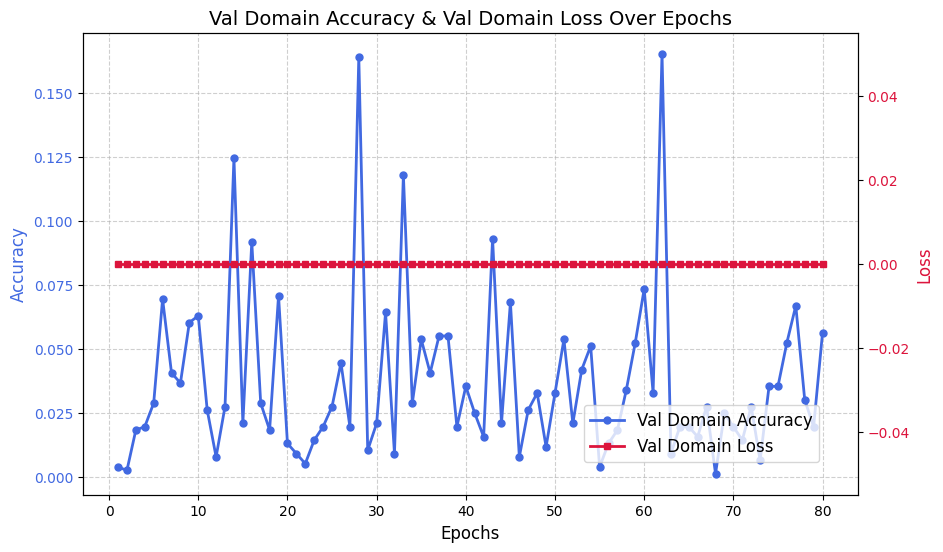

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Domain accuracy values
domain_accuracy = [0.003937007859349251, 0.002624671906232834, 0.018372703343629837, 0.019685039296746254, 0.028871390968561172, 0.06955380737781525, 0.040682416409254074, 0.036745406687259674, 0.06036745384335518, 0.06299212574958801, 0.02624671906232834, 0.007874015718698502, 0.027559055015444756, 0.12467191368341446, 0.02099737524986267, 0.09186352044343948, 0.028871390968561172, 0.018372703343629837, 0.07086614519357681, 0.01312335953116417, 0.009186351671814919, 0.005249343812465668, 0.014435695484280586, 0.019685039296746254, 0.027559055015444756, 0.044619422405958176, 0.019685039296746254, 0.16404199600219727, 0.010498687624931335, 0.02099737524986267, 0.06430446356534958, 0.009186351671814919, 0.11811023950576782, 0.028871390968561172, 0.05380577594041824, 0.040682416409254074, 0.05511811003088951, 0.05511811003088951, 0.019685039296746254, 0.035433072596788406, 0.02493438310921192, 0.015748031437397003, 0.09317585080862045, 0.02099737524986267, 0.06824146956205368, 0.007874015718698502, 0.02624671906232834, 0.03280840069055557, 0.011811023578047752, 0.03280840069055557, 0.05380577594041824, 0.02099737524986267, 0.04199475049972534, 0.05118110403418541, 0.003937007859349251, 0.01312335953116417, 0.018372703343629837, 0.03412073478102684, 0.05249343812465668, 0.07349081337451935, 0.03280840069055557, 0.16535432636737823, 0.009186351671814919, 0.019685039296746254, 0.019685039296746254, 0.015748031437397003, 0.027559055015444756, 0.001312335953116417, 0.02493438310921192, 0.019685039296746254, 0.014435695484280586, 0.027559055015444756, 0.006561679765582085, 0.035433072596788406, 0.035433072596788406, 0.05249343812465668, 0.06692913174629211, 0.03018372692167759, 0.019685039296746254, 0.05643044784665108]

# Domain loss values
domain_loss = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

# Convert lists to numpy arrays
epochs = np.arange(1, len(domain_accuracy) + 1)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Domain Accuracy (Primary Y-axis)
ax1.plot(epochs, domain_accuracy, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=2, label="Val Domain Accuracy")
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.grid(True, linestyle="--", alpha=0.6)

# Create second y-axis for Domain Loss
ax2 = ax1.twinx()
ax2.plot(epochs, domain_loss, marker='s', linestyle='-', color='crimson', markersize=5, linewidth=2, label="Val Domain Loss")
ax2.set_ylabel("Loss", fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Title and Legends
plt.title("Val Domain Accuracy & Val Domain Loss Over Epochs", fontsize=14)
fig.legend(loc="lower right", bbox_to_anchor=(0.87, 0.15), fontsize=12)

# Show the plot
plt.show()


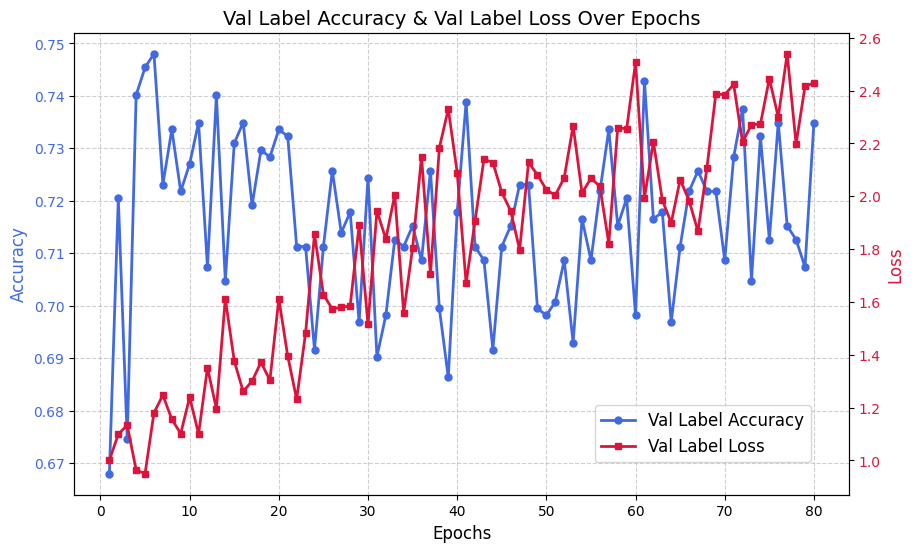

In [38]:
import numpy as np
import matplotlib.pyplot as plt

# Domain accuracy values
domain_accuracy =[0.6679790019989014, 0.7204724550247192, 0.6745406985282898, 0.7401574850082397, 0.7454068064689636, 0.748031497001648, 0.7230970859527588, 0.7335957884788513, 0.721784770488739, 0.7270340919494629, 0.7349081635475159, 0.7073490619659424, 0.7401574850082397, 0.7047244310379028, 0.7309711575508118, 0.7349081635475159, 0.7191600799560547, 0.7296587824821472, 0.7283464670181274, 0.7335957884788513, 0.7322834730148315, 0.7112860679626465, 0.7112860679626465, 0.691601037979126, 0.7112860679626465, 0.7257217764854431, 0.7139107584953308, 0.7178477644920349, 0.6968504190444946, 0.7244094610214233, 0.6902887225151062, 0.6981627345085144, 0.712598443031311, 0.7112860679626465, 0.7152230739593506, 0.7086614370346069, 0.7257217764854431, 0.6994750499725342, 0.6863517165184021, 0.7178477644920349, 0.73884516954422, 0.7112860679626465, 0.7086614370346069, 0.691601037979126, 0.7112860679626465, 0.7152230739593506, 0.7230970859527588, 0.7230970859527588, 0.6994750499725342, 0.6981627345085144, 0.7007874250411987, 0.7086614370346069, 0.6929134130477905, 0.7165354490280151, 0.7086614370346069, 0.721784770488739, 0.7335957884788513, 0.7152230739593506, 0.7204724550247192, 0.6981627345085144, 0.7427821755409241, 0.7165354490280151, 0.7178477644920349, 0.6968504190444946, 0.7112860679626465, 0.721784770488739, 0.7257217764854431, 0.721784770488739, 0.721784770488739, 0.7086614370346069, 0.7283464670181274, 0.7375327944755554, 0.7047244310379028, 0.7322834730148315, 0.712598443031311, 0.7349081635475159, 0.7152230739593506, 0.712598443031311, 0.7073490619659424, 0.7349081635475159]

# Domain loss values
domain_loss = [1.0006686449050903, 1.0988913774490356, 1.133906364440918, 0.9640074372291565, 0.949798047542572, 1.1807762384414673, 1.2471928596496582, 1.1557855606079102, 1.1017175912857056, 1.239420771598816, 1.1008013486862183, 1.3508787155151367, 1.1953924894332886, 1.6127396821975708, 1.3769022226333618, 1.261319637298584, 1.3003326654434204, 1.3716620206832886, 1.303773283958435, 1.6121245622634888, 1.394842267036438, 1.2318564653396606, 1.4827098846435547, 1.8561416864395142, 1.628020167350769, 1.5734204053878784, 1.5795150995254517, 1.5851892232894897, 1.8895400762557983, 1.5148372650146484, 1.9452276229858398, 1.8379054069519043, 2.0062897205352783, 1.559604287147522, 1.8042840957641602, 2.1496357917785645, 1.7045942544937134, 2.183678388595581, 2.330409288406372, 2.089684247970581, 1.6712638139724731, 1.9064658880233765, 2.140568494796753, 2.1277847290039062, 2.015021562576294, 1.9445080757141113, 1.7977217435836792, 2.1280128955841064, 2.0814924240112305, 2.024582862854004, 2.0038559436798096, 2.070279359817505, 2.266648530960083, 2.0121304988861084, 2.0687217712402344, 2.0371756553649902, 1.821070671081543, 2.2601256370544434, 2.2553775310516357, 2.507573127746582, 1.9937796592712402, 2.206986427307129, 1.9856079816818237, 1.8995550870895386, 2.06337833404541, 1.9837355613708496, 1.8670107126235962, 2.1064631938934326, 2.3877296447753906, 2.3842315673828125, 2.423778772354126, 2.204423189163208, 2.271519660949707, 2.2732691764831543, 2.4454524517059326, 2.3000171184539795, 2.5397555828094482, 2.1981089115142822, 2.4164392948150635, 2.429379463195801]

# Convert lists to numpy arrays
epochs = np.arange(1, len(domain_accuracy) + 1)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Domain Accuracy (Primary Y-axis)
ax1.plot(epochs, domain_accuracy, marker='o', linestyle='-', color='royalblue', markersize=5, linewidth=2, label="Val Label Accuracy")
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12, color='royalblue')
ax1.tick_params(axis='y', labelcolor='royalblue')
ax1.grid(True, linestyle="--", alpha=0.6)

# Create second y-axis for Domain Loss
ax2 = ax1.twinx()
ax2.plot(epochs, domain_loss, marker='s', linestyle='-', color='crimson', markersize=5, linewidth=2, label="Val Label Loss")
ax2.set_ylabel("Loss", fontsize=12, color='crimson')
ax2.tick_params(axis='y', labelcolor='crimson')

# Title and Legends
plt.title("Val Label Accuracy & Val Label Loss Over Epochs", fontsize=14)
fig.legend(loc="lower right", bbox_to_anchor=(0.87, 0.15), fontsize=12)

# Show the plot
plt.show()


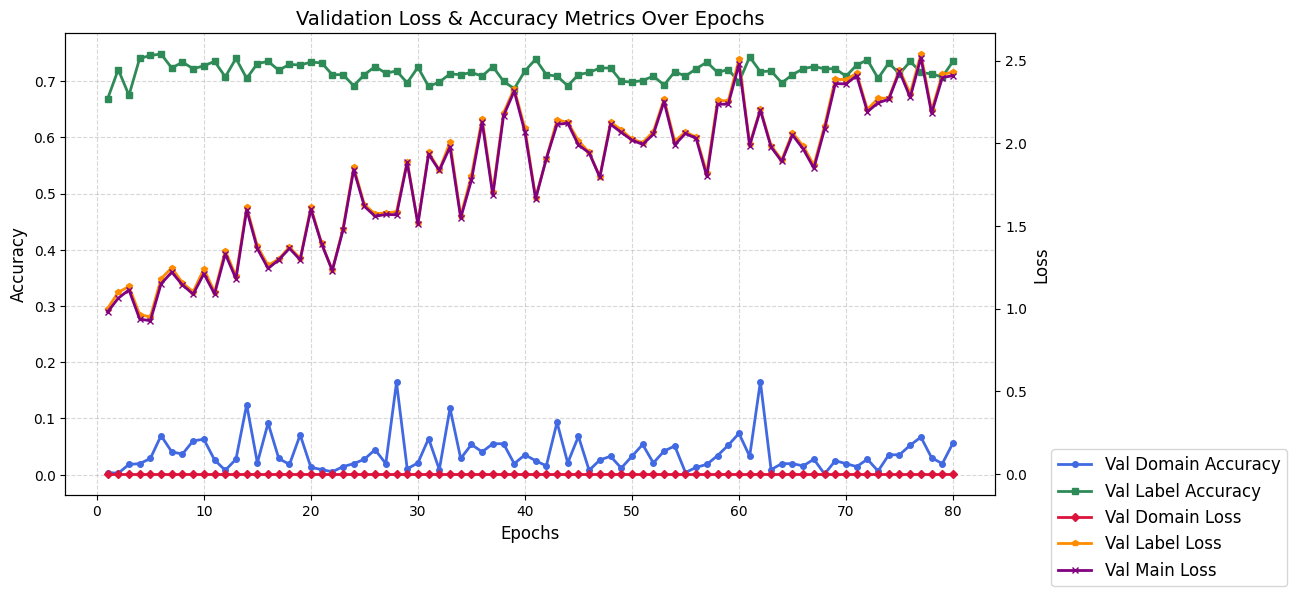

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Validation Domain Accuracy (Replace with your actual values)
val_domain_accuracy = np.array([0.003937007859349251, 0.002624671906232834, 0.018372703343629837, 0.019685039296746254, 0.028871390968561172, 0.06955380737781525, 0.040682416409254074, 0.036745406687259674, 0.06036745384335518, 0.06299212574958801, 0.02624671906232834, 0.007874015718698502, 0.027559055015444756, 0.12467191368341446, 0.02099737524986267, 0.09186352044343948, 0.028871390968561172, 0.018372703343629837, 0.07086614519357681, 0.01312335953116417, 0.009186351671814919, 0.005249343812465668, 0.014435695484280586, 0.019685039296746254, 0.027559055015444756, 0.044619422405958176, 0.019685039296746254, 0.16404199600219727, 0.010498687624931335, 0.02099737524986267, 0.06430446356534958, 0.009186351671814919, 0.11811023950576782, 0.028871390968561172, 0.05380577594041824, 0.040682416409254074, 0.05511811003088951, 0.05511811003088951, 0.019685039296746254, 0.035433072596788406, 0.02493438310921192, 0.015748031437397003, 0.09317585080862045, 0.02099737524986267, 0.06824146956205368, 0.007874015718698502, 0.02624671906232834, 0.03280840069055557, 0.011811023578047752, 0.03280840069055557, 0.05380577594041824, 0.02099737524986267, 0.04199475049972534, 0.05118110403418541, 0.003937007859349251, 0.01312335953116417, 0.018372703343629837, 0.03412073478102684, 0.05249343812465668, 0.07349081337451935, 0.03280840069055557, 0.16535432636737823, 0.009186351671814919, 0.019685039296746254, 0.019685039296746254, 0.015748031437397003, 0.027559055015444756, 0.001312335953116417, 0.02493438310921192, 0.019685039296746254, 0.014435695484280586, 0.027559055015444756, 0.006561679765582085, 0.035433072596788406, 0.035433072596788406, 0.05249343812465668, 0.06692913174629211, 0.03018372692167759, 0.019685039296746254, 0.05643044784665108])  
# Validation Domain Loss (Replace with your actual values)
val_domain_loss = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])  
# Validation Label Accuracy (Replace with your actual values)
val_label_accuracy = np.array([0.6679790019989014, 0.7204724550247192, 0.6745406985282898, 0.7401574850082397, 0.7454068064689636, 0.748031497001648, 0.7230970859527588, 0.7335957884788513, 0.721784770488739, 0.7270340919494629, 0.7349081635475159, 0.7073490619659424, 0.7401574850082397, 0.7047244310379028, 0.7309711575508118, 0.7349081635475159, 0.7191600799560547, 0.7296587824821472, 0.7283464670181274, 0.7335957884788513, 0.7322834730148315, 0.7112860679626465, 0.7112860679626465, 0.691601037979126, 0.7112860679626465, 0.7257217764854431, 0.7139107584953308, 0.7178477644920349, 0.6968504190444946, 0.7244094610214233, 0.6902887225151062, 0.6981627345085144, 0.712598443031311, 0.7112860679626465, 0.7152230739593506, 0.7086614370346069, 0.7257217764854431, 0.6994750499725342, 0.6863517165184021, 0.7178477644920349, 0.73884516954422, 0.7112860679626465, 0.7086614370346069, 0.691601037979126, 0.7112860679626465, 0.7152230739593506, 0.7230970859527588, 0.7230970859527588, 0.6994750499725342, 0.6981627345085144, 0.7007874250411987, 0.7086614370346069, 0.6929134130477905, 0.7165354490280151, 0.7086614370346069, 0.721784770488739, 0.7335957884788513, 0.7152230739593506, 0.7204724550247192, 0.6981627345085144, 0.7427821755409241, 0.7165354490280151, 0.7178477644920349, 0.6968504190444946, 0.7112860679626465, 0.721784770488739, 0.7257217764854431, 0.721784770488739, 0.721784770488739, 0.7086614370346069, 0.7283464670181274, 0.7375327944755554, 0.7047244310379028, 0.7322834730148315, 0.712598443031311, 0.7349081635475159, 0.7152230739593506, 0.712598443031311, 0.7073490619659424, 0.7349081635475159])  
# Validation Label Loss (Replace with your actual values)
val_label_loss = np.array([1.0006686449050903, 1.0988913774490356, 1.133906364440918, 0.9640074372291565, 0.949798047542572, 1.1807762384414673, 1.2471928596496582, 1.1557855606079102, 1.1017175912857056, 1.239420771598816, 1.1008013486862183, 1.3508787155151367, 1.1953924894332886, 1.6127396821975708, 1.3769022226333618, 1.261319637298584, 1.3003326654434204, 1.3716620206832886, 1.303773283958435, 1.6121245622634888, 1.394842267036438, 1.2318564653396606, 1.4827098846435547, 1.8561416864395142, 1.628020167350769, 1.5734204053878784, 1.5795150995254517, 1.5851892232894897, 1.8895400762557983, 1.5148372650146484, 1.9452276229858398, 1.8379054069519043, 2.0062897205352783, 1.559604287147522, 1.8042840957641602, 2.1496357917785645, 1.7045942544937134, 2.183678388595581, 2.330409288406372, 2.089684247970581, 1.6712638139724731, 1.9064658880233765, 2.140568494796753, 2.1277847290039062, 2.015021562576294, 1.9445080757141113, 1.7977217435836792, 2.1280128955841064, 2.0814924240112305, 2.024582862854004, 2.0038559436798096, 2.070279359817505, 2.266648530960083, 2.0121304988861084, 2.0687217712402344, 2.0371756553649902, 1.821070671081543, 2.2601256370544434, 2.2553775310516357, 2.507573127746582, 1.9937796592712402, 2.206986427307129, 1.9856079816818237, 1.8995550870895386, 2.06337833404541, 1.9837355613708496, 1.8670107126235962, 2.1064631938934326, 2.3877296447753906, 2.3842315673828125, 2.423778772354126, 2.204423189163208, 2.271519660949707, 2.2732691764831543, 2.4454524517059326, 2.3000171184539795, 2.5397555828094482, 2.1981089115142822, 2.4164392948150635, 2.429379463195801])  
# Main Validation Loss (Your provided values)
val_main_loss = np.array([
    0.9798, 1.0629, 1.1134, 0.9373, 0.9266, 1.1498, 1.2208, 1.1431, 1.0873, 1.2110, 
    1.0886, 1.3310, 1.1803, 1.5974, 1.3625, 1.2429, 1.2952, 1.3644, 1.2949, 1.6009, 
    1.3921, 1.2304, 1.4745, 1.8404, 1.6186, 1.5584, 1.5697, 1.5673, 1.8841, 1.5117, 
    1.9338, 1.8356, 1.9775, 1.5481, 1.7768, 2.1280, 1.6864, 2.1663, 2.3151, 2.0671, 
    1.6635, 1.9068, 2.1142, 2.1213, 1.9898, 1.9422, 1.7947, 2.1147, 2.0658, 2.0195, 
    1.9929, 2.0545, 2.2524, 1.9906, 2.0593, 2.0295, 1.7991, 2.2358, 2.2367, 2.4772, 
    1.9860, 2.1999, 1.9770, 1.8901, 2.0506, 1.9654, 1.8492, 2.0863, 2.3607, 2.3590, 
    2.4088, 2.1904, 2.2447, 2.2660, 2.4343, 2.2771, 2.5175, 2.1810, 2.3970, 2.4090
])

# Define epochs
epochs = np.arange(1, len(val_main_loss) + 1)

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Accuracy (Primary Y-axis)
ax1.plot(epochs, val_domain_accuracy, marker='o', linestyle='-', color='royalblue', markersize=4, linewidth=2, label="Val Domain Accuracy")
ax1.plot(epochs, val_label_accuracy, marker='s', linestyle='-', color='seagreen', markersize=4, linewidth=2, label="Val Label Accuracy")
ax1.set_xlabel("Epochs", fontsize=12)
ax1.set_ylabel("Accuracy", fontsize=12, color='black')
ax1.tick_params(axis='y', labelcolor='black')
ax1.grid(True, linestyle="--", alpha=0.5)

# Create second Y-axis for Loss
ax2 = ax1.twinx()
ax2.plot(epochs, val_domain_loss, marker='D', linestyle='-', color='crimson', markersize=4, linewidth=2, label="Val Domain Loss")
ax2.plot(epochs, val_label_loss, marker='p', linestyle='-', color='darkorange', markersize=4, linewidth=2, label="Val Label Loss")
ax2.plot(epochs, val_main_loss, marker='x', linestyle='-', color='purple', markersize=5, linewidth=2, label="Val Main Loss")
ax2.set_ylabel("Loss", fontsize=12, color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Title and Legends
plt.title("Validation Loss & Accuracy Metrics Over Epochs", fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(1.15, 0.2), fontsize=12)

# Show the plot
plt.show()


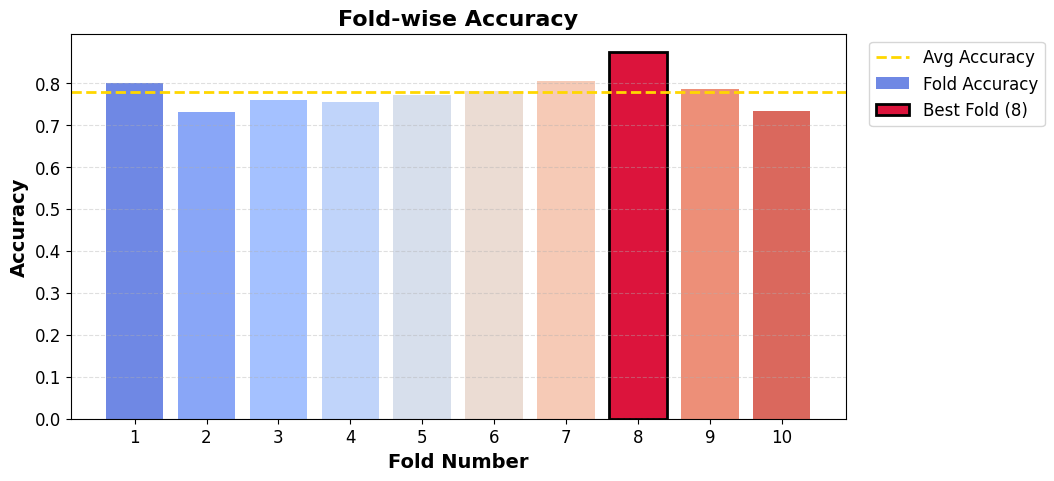

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data
folds = np.arange(1, 11)
fold_accuracies = [0.8011, 0.7299, 0.7595, 0.7539, 0.7703, 
                   0.7814, 0.8051, 0.8737, 0.7861, 0.7336]
best_fold = 7
best_fold_acc = 0.8737

# Plot
plt.figure(figsize=(10, 5))
colors = sns.color_palette("coolwarm", len(folds))
plt.bar(folds, fold_accuracies, color=colors, alpha=0.85, label="Fold Accuracy")
plt.axhline(y=np.mean(fold_accuracies), color="gold", linestyle="--", linewidth=2, label="Avg Accuracy")
plt.bar(best_fold + 1, best_fold_acc, color="crimson", edgecolor="black", linewidth=2, label="Best Fold (8)")

# Labels & Titles
plt.xlabel("Fold Number", fontsize=14, fontweight="bold")
plt.ylabel("Accuracy", fontsize=14, fontweight="bold")
plt.title("Fold-wise Accuracy", fontsize=16, fontweight="bold")
plt.xticks(folds, fontsize=12)

# Fix y-axis ticks
plt.yticks(np.arange(0.0, 0.9, 0.1), fontsize=12)

# Move Legend **Outside** the Plot (More Upper Right)
plt.legend(fontsize=12, loc="upper left", bbox_to_anchor=(1.02, 1.0))

# Grid
plt.grid(axis="y", linestyle="--", alpha=0.4)

# Show plot
plt.show()


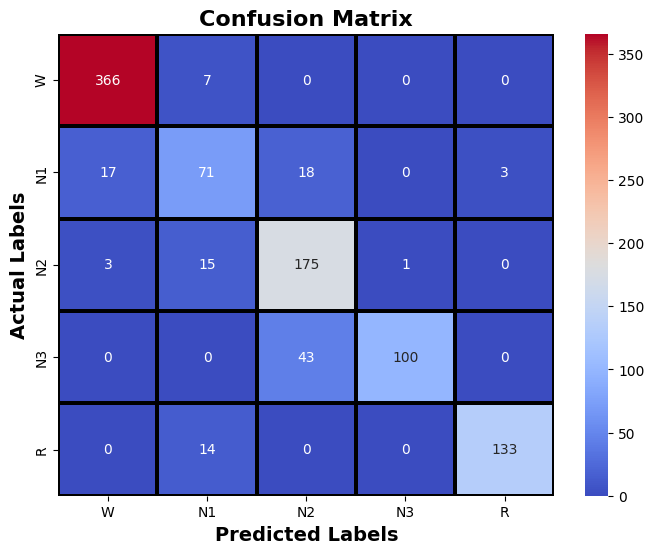

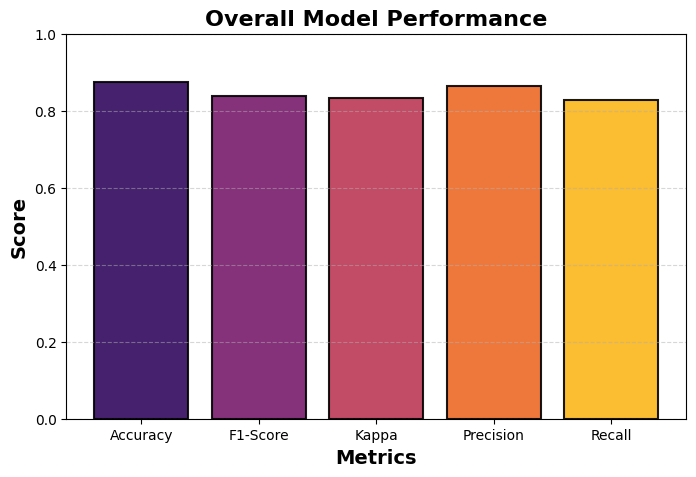

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# ---- 3. Confusion Matrix ---- #
conf_matrix = np.array([
    [366,   7,   0,   0,   0],
    [ 17,  71,  18,   0,   3],
    [  3,  15, 175,   1,   0],
    [  0,   0,  43, 100,   0],
    [  0,  14,   0,   0, 133]
])

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm", xticklabels=classes, yticklabels=classes, linewidths=1.5, linecolor="black", cbar=True)
plt.xlabel("Predicted Labels", fontsize=14, fontweight="bold")
plt.ylabel("Actual Labels", fontsize=14, fontweight="bold")
plt.title("Confusion Matrix", fontsize=16, fontweight="bold")
plt.show()

# ---- 4. Main Metrics Plot ---- #
metrics = ["Accuracy", "F1-Score", "Kappa", "Precision", "Recall"]
values = [0.8747, 0.8391, 0.8324, 0.8643, 0.8277]

plt.figure(figsize=(8, 5))
colors = sns.color_palette("inferno", len(metrics))
plt.bar(metrics, values, color=colors, alpha=0.9, edgecolor="black", linewidth=1.5)
plt.xlabel("Metrics", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=14, fontweight="bold")
plt.title("Overall Model Performance", fontsize=16, fontweight="bold")
plt.ylim(0, 1)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


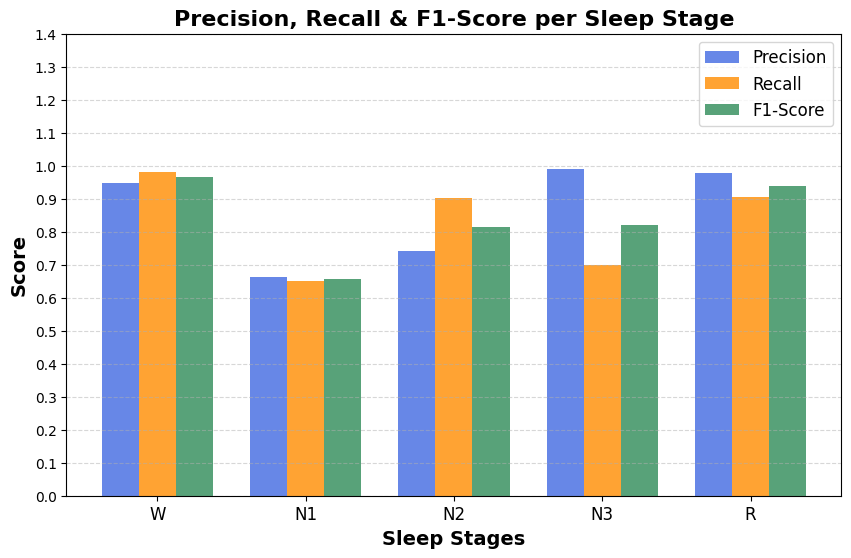

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Classes
classes = ["W", "N1", "N2", "N3", "R"]

# Metrics for each class
precision = [0.9482, 0.6636, 0.7415, 0.9901, 0.9779]
recall = [0.9812, 0.6514, 0.9021, 0.6993, 0.9048]
f1_score = [0.9644, 0.6574, 0.8140, 0.8197, 0.9399]

# Bar width
bar_width = 0.25
x = np.arange(len(classes))

# Create figure
plt.figure(figsize=(10, 6))

# Plot bars
plt.bar(x - bar_width, precision, width=bar_width, color="royalblue", label="Precision", alpha=0.8)
plt.bar(x, recall, width=bar_width, color="darkorange", label="Recall", alpha=0.8)
plt.bar(x + bar_width, f1_score, width=bar_width, color="seagreen", label="F1-Score", alpha=0.8)

# Labels & Titles
plt.xlabel("Sleep Stages", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=14, fontweight="bold")
plt.title("Precision, Recall & F1-Score per Sleep Stage", fontsize=16, fontweight="bold")
plt.xticks(x, classes, fontsize=12)
plt.yticks(np.arange(0, 1.5, 0.1))
plt.legend(fontsize=12, loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.5)

# Show plot
plt.show()


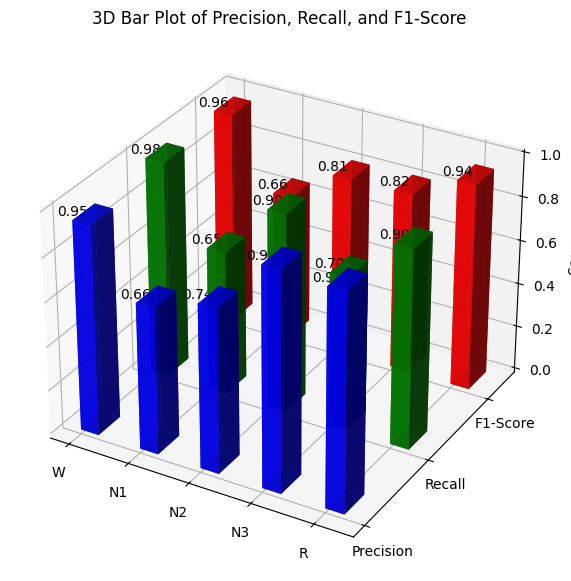

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sleep stages
categories = ["W", "N1", "N2", "N3", "R"]

# Precision, Recall, F1-score values
precision = [0.9482, 0.6636, 0.7415, 0.9901, 0.9779]
recall = [0.9812, 0.6514, 0.9021, 0.6993, 0.9048]
f1_score = [0.9644, 0.6574, 0.8140, 0.8197, 0.9399]

# X, Y positions for bars
x_pos = np.arange(len(categories))
y_pos = np.array([0, 1, 2])  # 0: Precision, 1: Recall, 2: F1-score
colors = ['b', 'g', 'r']  # Colors for precision, recall, and f1-score

# Creating 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Bar width
width = 0.3

# Plot bars
for i, (metric, color) in enumerate(zip([precision, recall, f1_score], colors)):
    ax.bar3d(x_pos, np.full_like(x_pos, y_pos[i]), 0, width, width, metric, color=color, alpha=0.8)

# Labels
ax.set_xticks(x_pos)
ax.set_xticklabels(categories)
ax.set_yticks(y_pos)
ax.set_yticklabels(["Precision", "Recall", "F1-Score"])
ax.set_zlabel("Score")

# Adding values on top of bars
for i, metric in enumerate([precision, recall, f1_score]):
    for j, val in enumerate(metric):
        ax.text(x_pos[j], y_pos[i], val + 0.02, f"{val:.2f}", color='black', fontsize=10, ha='center')

# Title
ax.set_title("3D Bar Plot of Precision, Recall, and F1-Score")

plt.show()


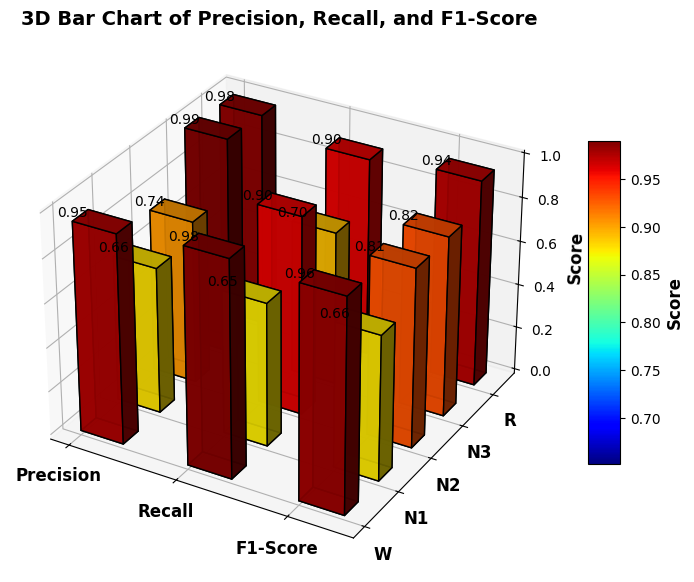

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define data categories
categories = ['W', 'N1', 'N2', 'N3', 'R']  # Sleep stages
metrics = ['Precision', 'Recall', 'F1-Score']  # Performance metrics

# Classification scores
values = np.array([
    [0.9482, 0.9812, 0.9644],  # W
    [0.6636, 0.6514, 0.6574],  # N1
    [0.7415, 0.9021, 0.8140],  # N2
    [0.9901, 0.6993, 0.8197],  # N3
    [0.9779, 0.9048, 0.9399]   # R
])

# Create figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Generate positions
x_pos, y_pos = np.meshgrid(np.arange(len(metrics)), np.arange(len(categories)))
x_pos = x_pos.flatten()
y_pos = y_pos.flatten()
z_pos = np.zeros_like(x_pos)

# Define bar width and depth
dx = 0.4
dy = 0.4
dz = values.flatten()

# Color mapping
colors = plt.cm.jet(dz / dz.max())

# Plot bars
ax.bar3d(x_pos, y_pos, z_pos, dx, dy, dz, color=colors, edgecolor='k', alpha=0.9)

# Add text labels on bars
for i in range(len(dz)):
    ax.text(x_pos[i], y_pos[i], dz[i] + 0.02, f"{dz[i]:.2f}", color='black', fontsize=10, ha='center')

# Set axis labels and title
ax.set_xticks(np.arange(len(metrics)))
ax.set_xticklabels(metrics, fontsize=12, fontweight='bold')
ax.set_yticks(np.arange(len(categories)))
ax.set_yticklabels(categories, fontsize=12, fontweight='bold')
ax.set_zlabel("Score", fontsize=12, fontweight='bold')
ax.set_title("3D Bar Chart of Precision, Recall, and F1-Score", fontsize=14, fontweight='bold')

# Color bar
sm = plt.cm.ScalarMappable(cmap=plt.cm.jet, norm=plt.Normalize(vmin=dz.min(), vmax=dz.max()))
cbar = plt.colorbar(sm, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("Score", fontsize=12, fontweight='bold')

# Show plot
plt.show()
